In [120]:
import numpy as np
import pandas as pd
import random
import json

# Read and parse the JSON file
with open('train_file.json', 'r') as f:
    data = json.load(f)

with open('val_file.json', 'r') as f:
    data_val = json.load(f)
# for all speakers replace " " with "_"
for i in range(len(data)):
    for j in range(len(data[i]['speakers'])):
        data[i]['speakers'][j] = data[i]['speakers'][j].replace(" ", "_")

for i in range(len(data_val)):
    for j in range(len(data_val[i]['speakers'])):
        data_val[i]['speakers'][j] = data_val[i]['speakers'][j].replace(" ", "_")



data3=data+data_val
for i in range(len(data3)):
    for j in range(len(data3[i]['speakers'])):
        data3[i]['speakers'][j] = data3[i]['speakers'][j].replace(" ", "_")


df3=pd.DataFrame(data3)

    
df_train = pd.DataFrame(data)
df_val = pd.DataFrame(data_val)




utterances = df_train['utterances'].tolist()
emotions = df_train['emotions'].tolist()
speakers = df_train['speakers'].tolist()
triggers = df_train['triggers'].tolist()

utterances_val = df_val['utterances'].tolist()
emotions_val = df_val['emotions'].tolist()
speakers_val = df_val['speakers'].tolist()
triggers_val = df_val['triggers'].tolist()

# Define sample data
# speakers = ['Monica', 'Phoebe', 'Joey', 'Rachel', 'Chandler', 'Ross']
# emotions = ['disgust', 'anger', 'sadness', 'surprise', 'joy', 'neutral']

# Generate random data
# np.random.seed(42)
data = {
    'speakers': speakers,
    'emotions': emotions,
    'utterances': utterances,
    'triggers': triggers
}

data_val = {
    'speakers': speakers_val,
    'emotions': emotions_val,
    'utterances': utterances_val,
    'triggers': triggers_val
}

df = pd.DataFrame(data)
df_val = pd.DataFrame(data_val) 





In [121]:
print(df_train.shape)
print(df_val.shape)
print(df_train.head())
df_val.head()

(6740, 5)
(843, 4)
          episode                                           speakers  \
0  utterance_3492               [Phoebe, Eric, Phoebe, Eric, Phoebe]   
1  utterance_3952  [Monica, Monica, Phoebe, Joey, Joey, Joey, Rac...   
2  utterance_3198  [Older_Scientist, Ross, Ross, Joey, Ross, Ross...   
3  utterance_2834                           [Monica, Monica, Monica]   
4   utterance_453                         [Kate, The_Director, Kate]   

                                            emotions  \
0       [surprise, fear, surprise, sadness, disgust]   
1  [disgust, disgust, anger, sadness, surprise, a...   
2  [neutral, neutral, neutral, neutral, neutral, ...   
3                       [neutral, surprise, neutral]   
4                            [joy, sadness, sadness]   

                                          utterances  \
0  [You-youyou had sex with Ursula?!, Uh, a litt...   
1  [Dad, please don't pick your teeth out here!, ...   
2  [Dr. Geller, there's a seat over here., 

,speakers,emotions,utterances,triggers
0,"[Chandler, Joey, Chandler, Joey, Joey, Chandle...","[anger, neutral, neutral, surprise, anger, dis...","[Hey! Hold on a minute, hold on a second. Do y...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[Elizabeth, Ross, Paul, Ross, Paul, Ross, Paul...","[neutral, joy, neutral, neutral, anger, surpri...","[This is my father, Paul Stevens. Dad, this is...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[Ross, Chandler, Ross, Chandler, Ross, Chandle...","[neutral, neutral, neutral, joy, fear, joy, su...","[Ok, bye. Well, Monica's not coming, it's jus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
3,"[Rachel, Joey, Rachel, Joey, Rachel, Joey]","[surprise, neutral, disgust, neutral, surprise...","[I thought I was a complete idiot., Hey, Im w...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
4,"[Monica, Monica, Phoebe, Joey, Joey, Joey, Rac...","[disgust, disgust, anger, sadness, surprise, a...","[Dad, please don't pick your teeth out here!, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [122]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and contains a column 'utterances' which is a list of utterance lists
all_words = set()  # Set to store all unique words

# Collect all words from the utterances
for utterance_list in df['utterances']:
    for utterance in utterance_list:
        all_words.update(utterance.lower().split())  # Add words to the set

# Create word_to_ix dictionary
word_to_ix = {word: i for i, word in enumerate(all_words)}


In [123]:
import numpy as np

def load_glove_embeddings(path, word_to_ix, embedding_dim=200):
    embeddings = np.zeros((len(word_to_ix), embedding_dim))
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            if word in word_to_ix:
                vector = np.asarray(values[1:], dtype='float32')
                embeddings[word_to_ix[word]] = vector
    return embeddings

# Assuming word_to_ix is already defined as shown in previous examples
glove_path = 'glove.txt'  # Update with the path to your GloVe file
embedding_dim = 200  # Common dimensions are 50, 100, 200, 300
glove_embeddings = load_glove_embeddings(glove_path, word_to_ix, embedding_dim)


In [124]:
#  all emotions from df_train and  df_val
all_emotions = set()
for emotion_list in df3['emotions']:
    for emotion in emotion_list:
        all_emotions.update(emotion.lower().split())  # Add emotions to the set

all_emotions= list(all_emotions)
all_emotions=np.array(all_emotions)

# all speakers and speakers 
all_speakers = set()
for speaker_list in df3['speakers']:
    for speaker in speaker_list:
        all_speakers.update(speaker.split())  # Add speakers to the set

all_speakers= list(all_speakers)
all_speakers=np.array(all_speakers)




In [125]:
print(word_to_ix)

{'d-cup.': 0, 'catching': 1, 'canvas.': 2, 'beer.': 3, 'mistaken,': 4, 'hubba-bubba': 5, 'kidding': 6, 'bank': 7, 'line,': 8, 'vibe?': 9, '"it\'s': 10, "can't,": 11, 'course!': 12, 'sweating': 13, 'god!is': 14, 'home.': 15, 'clothes!': 16, 'r-r-richard': 17, 'pit': 18, 'hole,': 19, 'away,': 20, 'noise.': 21, 'countries': 22, 'lunch!': 23, 'granted': 24, 'number!': 25, 'starting': 26, 'feel?': 27, 'injure': 28, 'we\x92ll': 29, '7': 30, 'hulk.': 31, 'francis!': 32, 'roof': 33, 'docile.': 34, 'wedding...': 35, 'soon': 36, 'charm': 37, 'marriage?!': 38, 'queens,': 39, 'maybe!': 40, 'european': 41, 'dance.': 42, 'cinderelly.': 43, 'breaking?': 44, 'strangers.': 45, "victoria's": 46, 'sweetheart,': 47, 'crime': 48, 'sucks!': 49, 'thoughts': 50, 'ink': 51, 'side,': 52, 'duties?': 53, 'happened': 54, 'land': 55, 'jackass!': 56, 'then.': 57, 'bug,': 58, 'big,': 59, 'eyes,': 60, 'watch,': 61, 'finding': 62, 'him!': 63, 'see.': 64, 'nimitz,': 65, 'heads,': 66, 'bug': 67, 'philange.': 68, 'boobies

In [126]:
#save word_to_ix dictionary in a json file
with open('word_to_ix.json', 'w') as f:
    json.dump(word_to_ix, f)

In [147]:
# print(all_speakers) in  coma separated format
# join the list elements with ', ' separator and print
print(",".join(all_speakers))

Stevens,The_Director,Paul,Cliff,Angela,Cookie,Paleontologist,Sophie,Teacher,Susan,Maitre_d',Another_Tour_Guide,Guy_#1,Mrs._Green,The_Hot_Girl,Mr._Posner,Joanne,Joey's_Hand_Twin,Dr._Miller,Monica,Stage_Director,Kiki,Singer,Another_Scientist,Sick_Bastard,Dr._Drake_Remoray,Chandler,Casey,Earl,Front_Desk_Clerk,Mrs._Geller,Chip,Kate,Mindy,Isabella,Joey_and_Chandler,Dana,Tom,Dr._Harad,Rick,Mr._Tribbiani,Hitchhiker,Bobby,Phoebe_Sr,1st_Customer,Man,Flight_Attendant,The_Guys,Kathy,Jeannine,The_Potential_Roommate,Waiter,Mona's_Date,Danny,Dr._Green,Tour_Guide,Gary,Ben,2nd_Customer,Director,Jen,Mrs._Tedlock,Issac,The_Grip,Dr._Leedbetter,TV_Announcer,Phoebe,Carl,Jane,Phoebe_and_Rachel,Bonnie,Frank,Barry,Mike,Janice,Guy,Friend_No._2,Stranger,Eric,Sarah,Nurse_#2,Phoebe_Sr.,PBS_Volunteer,Joey_and_Ross,The_Singing_Man,Jill,Charlton_Heston,Megan,Dr._Baldhara,Lorraine,Joey,Kim,Mr._Geller,Hold_Voice,Jay_Leno,Hotel_Clerk,Mr._Zelner,The_Conductor,Emeril,Tag,Gunther,Cassie,The_Food_Critic,Mrs._Lynch,Dr._Ober

In [128]:
print(all_emotions) 

['disgust' 'neutral' 'fear' 'surprise' 'joy' 'anger' 'sadness']


In [129]:
from sklearn.preprocessing import OneHotEncoder
from torch_geometric.data import Data
import torch

# Prepare encoders
text_encoder = OneHotEncoder()  # Simplified; use GloVe in practice
emotion_encoder = OneHotEncoder()
speaker_encoder = OneHotEncoder()

# Fit encoders
#all_speakers = np.unique(np.concatenate(df['speakers']))
#all_emotions = np.unique(np.concatenate(df['emotions']))
speaker_encoder.fit(all_speakers.reshape(-1, 1))
emotion_encoder.fit(all_emotions.reshape(-1, 1))

def encode_features(row, glove_embeddings, word_to_ix, embedding_dim=200):
    # Encode speaker and emotion features
    speaker_features = speaker_encoder.transform(np.array(row['speakers']).reshape(-1, 1)).toarray()
    emotion_features = emotion_encoder.transform(np.array(row['emotions']).reshape(-1, 1)).toarray()

    # Encode text using GloVe
    text_features = np.zeros((len(row['utterances']), embedding_dim))
    for i, utterance in enumerate(row['utterances']):
        words = utterance.lower().split()
        word_vectors = np.array([glove_embeddings[word_to_ix[word]] for word in words if word in word_to_ix])
        if len(word_vectors) > 0:
            text_features[i] = np.mean(word_vectors, axis=0)  # Average the word vectors

    # Combine all features
    return np.concatenate([speaker_features, emotion_features, text_features], axis=1)


# Create edge indices
def create_edges(num_nodes):
    return np.array([[i, i+1] for i in range(num_nodes - 1)]).T




In [130]:
#!pip install torch_geometric -q

In [131]:
print(df.head())

                                            speakers  \
0               [Phoebe, Eric, Phoebe, Eric, Phoebe]   
1  [Monica, Monica, Phoebe, Joey, Joey, Joey, Rac...   
2  [Older_Scientist, Ross, Ross, Joey, Ross, Ross...   
3                           [Monica, Monica, Monica]   
4                         [Kate, The_Director, Kate]   

                                            emotions  \
0       [surprise, fear, surprise, sadness, disgust]   
1  [disgust, disgust, anger, sadness, surprise, a...   
2  [neutral, neutral, neutral, neutral, neutral, ...   
3                       [neutral, surprise, neutral]   
4                            [joy, sadness, sadness]   

                                          utterances  \
0  [You-youyou had sex with Ursula?!, Uh, a litt...   
1  [Dad, please don't pick your teeth out here!, ...   
2  [Dr. Geller, there's a seat over here., Thank ...   
3  [So, how'd the lasagne go over?, Really?!, Good.]   
4  [Become a drama critic!, I am hurt!  A plag

In [132]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class SimpleGCN(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleGCN, self).__init__()
        self.conv1 = GCNConv(input_dim, 16)
        self.conv2 = GCNConv(16, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Parameters
# Example of creating features for the first episode
features = encode_features(df.iloc[0], glove_embeddings, word_to_ix, embedding_dim)
edge_index = create_edges(len(df.iloc[0]['utterances']))

# Create torch geometric data
tg_data = Data(x=torch.tensor(features, dtype=torch.float), edge_index=torch.tensor(edge_index, dtype=torch.long))

input_dim = tg_data.x.shape[1]
output_dim = emotion_encoder.categories_[0].size

# Instantiate and train
model = SimpleGCN(input_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out, data.y)
    loss.backward()
    optimizer.step()
    return loss 

# Example training step
tg_data.y = torch.tensor([np.argmax(line) for line in features[:, len(all_speakers):len(all_speakers)+len(all_emotions)]], dtype=torch.long)
print("initiak", tg_data)
train(tg_data)
losses=[]
val_losses=[]
epochs=3
# train the model with all of the datas
for ep in range(epochs):
    total_loss=0
    co1=0
    
    for i in range(len(df)):
        # try:
        features = encode_features(df.iloc[i], glove_embeddings, word_to_ix, embedding_dim)

        input_dim = tg_data.x.shape[1]
        output_dim = emotion_encoder.categories_[0].size
        # except:
        #     print(i)
        #     print(df.iloc[i])
        edge_index = create_edges(len(df.iloc[i]))
        tg_data = Data(x=torch.tensor(features, dtype=torch.float), edge_index=torch.tensor(edge_index, dtype=torch.long))
        
        tg_data.y = torch.tensor([np.argmax(line) for line in features[:, len(all_speakers):len(all_speakers)+len(all_emotions)]], dtype=torch.long)
        # print(tg_data)
        # print(i)
        # if (i>17):
        #     print(df.iloc[i])
        if  tg_data.y.shape[0] >3:

            loss=train(tg_data)  
            co1+=1
        # if i%1000==0:
        #     print(loss)
            total_loss+=loss
    print(total_loss)
    losses.append(total_loss/co1)
    print(losses)

    #  calculate the validation loss
    total_val_loss=0
    co2=0
    for i in range(len(df_val)):
        # try:

        features = encode_features(df_val.iloc[i], glove_embeddings, word_to_ix, embedding_dim)

        input_dim = tg_data.x.shape[1]
        output_dim = emotion_encoder.categories_[0].size
        # except:
        #     print(i)
        edge_index = create_edges(len(df_val.iloc[i]))
        tg_data = Data(x=torch.tensor(features, dtype=torch.float), edge_index=torch.tensor(edge_index, dtype=torch.long))
        tg_data.y = torch.tensor([np.argmax(line) for line in features[:, len(all_speakers):len(all_speakers)+len(all_emotions)]], dtype=torch.long)
        if tg_data.y.shape[0] >3:
            val_loss=train(tg_data)
            total_val_loss+=val_loss
            co2+=1

    val_losses.append(total_val_loss/co2)
    print("Epoch: ", ep, "Loss: ", total_loss/co1, "Val Loss: ", total_val_loss/co2)




initiak Data(x=[5, 452], edge_index=[2, 4], y=[5])


tensor(5462.2617, grad_fn=<AddBackward0>)
[tensor(0.9095, grad_fn=<DivBackward0>)]
Epoch:  0 Loss:  tensor(0.9095, grad_fn=<DivBackward0>) Val Loss:  tensor(0.8709, grad_fn=<DivBackward0>)
tensor(5075.3848, grad_fn=<AddBackward0>)
[tensor(0.9095, grad_fn=<DivBackward0>), tensor(0.8451, grad_fn=<DivBackward0>)]
Epoch:  1 Loss:  tensor(0.8451, grad_fn=<DivBackward0>) Val Loss:  tensor(0.8503, grad_fn=<DivBackward0>)
tensor(4992.2764, grad_fn=<AddBackward0>)
[tensor(0.9095, grad_fn=<DivBackward0>), tensor(0.8451, grad_fn=<DivBackward0>), tensor(0.8312, grad_fn=<DivBackward0>)]
Epoch:  2 Loss:  tensor(0.8312, grad_fn=<DivBackward0>) Val Loss:  tensor(0.8344, grad_fn=<DivBackward0>)


In [133]:
print(losses)
print(val_losses)

[tensor(0.9095, grad_fn=<DivBackward0>), tensor(0.8451, grad_fn=<DivBackward0>), tensor(0.8312, grad_fn=<DivBackward0>)]
[tensor(0.8709, grad_fn=<DivBackward0>), tensor(0.8503, grad_fn=<DivBackward0>), tensor(0.8344, grad_fn=<DivBackward0>)]


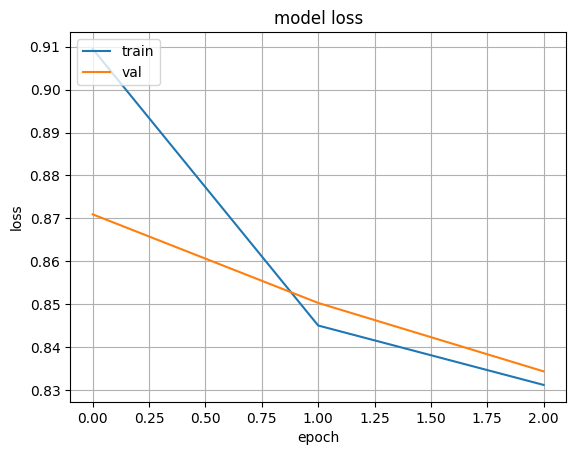

In [142]:
# make the graph for loesses
import matplotlib.pyplot as plt
losses2=[x.item() for x in losses]
val_losses2=[x.item() for x in val_losses]
plt.plot(losses2)
plt.plot(val_losses2)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [135]:
# print(co1, co2)

In [136]:
df=df_val

In [143]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np

# Example modifications for evaluation and loss calculation
def evaluate(data):
    model.eval()
    with torch.no_grad():
        out = model(data)
    y_pred = F.log_softmax(out, dim=1)  # Convert to log-probabilities
    return y_pred

# losses = []
accuracies = []
f1_scores = []
confusion_matrices = []
total_loss = 0
# emotion prediction dictionary
emotion_prediction = {}
n=0
# create a flip column to check if the emotion is in the list of emotions
for i in range(len(df)):
    emotion_dict={}
    features = encode_features(df.iloc[i], glove_embeddings, word_to_ix, 200)
    edge_index = create_edges(len(df.iloc[i]))
    tg_data = Data(x=torch.tensor(features, dtype=torch.float), edge_index=torch.tensor(edge_index, dtype=torch.long))
    tg_data.y = torch.tensor([np.argmax(line) for line in features[:, len(all_speakers):len(all_speakers)+len(all_emotions)]], dtype=torch.long)

    

    if tg_data.y.shape[0] <=3:
        continue
    n+=1
    y_pred = evaluate(tg_data)
    y_true = tg_data.y
    
    loss = F.nll_loss(y_pred, y_true)
    total_loss += loss.item()
    y_pred_labels = y_pred.argmax(dim=1)
    
    accuracies.append(accuracy_score(y_true, y_pred_labels))
    f1_scores.append(f1_score(y_true, y_pred_labels, average='macro'))
    for i in range(len(y_true)):
        # print the speaker id and emotion
        if y_true[i].item() in emotion_prediction:
            emotion_prediction[y_true[i].item()].append(y_pred_labels[i].item())
        else:
            emotion_prediction[y_true[i].item()] = [y_pred_labels[i].item()]
    confusion_matrices.append(confusion_matrix(y_true, y_pred_labels))
print(n)
print(f"Average Loss: {total_loss / n}")
print(f"Average Accuracy: {np.mean(accuracies)}")
print(f"Average F1 Score: {np.mean(f1_scores)}")
# print(f"Average Confusion Matrix:\n{np.mean(confusion_matrices, axis=0)}")
# for each emotion calculate the confusion matrix
# fincalConfusionMatrix = np.mean(confusion_matrices, axis=0)

# create final confusion matrix using the emotion_prediction dictionary
fincalConfusionMatrix = np.zeros((len(all_emotions), len(all_emotions)))
for key in emotion_prediction:
    for value in emotion_prediction[key]:
        fincalConfusionMatrix[key][value] += 1
# print(fincalConfusionMatrix)
# convert values to integers
fincalConfusionMatrix = fincalConfusionMatrix.astype(int)
print(fincalConfusionMatrix)





746
Average Loss: 0.6241674091886659
Average Accuracy: 0.7933258753598925
Average F1 Score: 0.7288189988599781
[[ 587   10    1   19   87   27   21]
 [   0  163    1    4   37    2    4]
 [   0    0  200   12   23   11    8]
 [   8    0    3  965  183   10   40]
 [  33    6   14  125 2796   34   84]
 [  10    0    1   10   71  421   17]
 [   5    2    1   47  151   26  740]]


In [144]:
print(all_speakers)

['Stevens' 'The_Director' 'Paul' 'Cliff' 'Angela' 'Cookie'
 'Paleontologist' 'Sophie' 'Teacher' 'Susan' "Maitre_d'"
 'Another_Tour_Guide' 'Guy_#1' 'Mrs._Green' 'The_Hot_Girl' 'Mr._Posner'
 'Joanne' "Joey's_Hand_Twin" 'Dr._Miller' 'Monica' 'Stage_Director' 'Kiki'
 'Singer' 'Another_Scientist' 'Sick_Bastard' 'Dr._Drake_Remoray'
 'Chandler' 'Casey' 'Earl' 'Front_Desk_Clerk' 'Mrs._Geller' 'Chip' 'Kate'
 'Mindy' 'Isabella' 'Joey_and_Chandler' 'Dana' 'Tom' 'Dr._Harad' 'Rick'
 'Mr._Tribbiani' 'Hitchhiker' 'Bobby' 'Phoebe_Sr' '1st_Customer' 'Man'
 'Flight_Attendant' 'The_Guys' 'Kathy' 'Jeannine' 'The_Potential_Roommate'
 'Waiter' "Mona's_Date" 'Danny' 'Dr._Green' 'Tour_Guide' 'Gary' 'Ben'
 '2nd_Customer' 'Director' 'Jen' 'Mrs._Tedlock' 'Issac' 'The_Grip'
 'Dr._Leedbetter' 'TV_Announcer' 'Phoebe' 'Carl' 'Jane'
 'Phoebe_and_Rachel' 'Bonnie' 'Frank' 'Barry' 'Mike' 'Janice' 'Guy'
 'Friend_No._2' 'Stranger' 'Eric' 'Sarah' 'Nurse_#2' 'Phoebe_Sr.'
 'PBS_Volunteer' 'Joey_and_Ross' 'The_Singing_Man' 'J

In [148]:
#  save the model using pickle
import pickle
filename = 'model_GCN_CLOVE_TASK1.sav'
pickle.dump(model, open(filename, 'wb'))


# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
